# Plotting Steinhardt output from md-tools using Python

Steinhardt q6 data was generated as a CSV file, using the following inputs:
```
md-tools steinhardt --q6 -s tests/water.gro -t tests/water.xtc -o examples/test.csv
```
This outputs a CSV file: `examples/test.q6.csv`.

We will use `matplotlib`, `pandas` and `numpy` to plot two graphs:
1. a histogram of q6 values across all frames,
2. a line graph of average q6 per frame.

Note that the example inputs are liquid water, so the q6 values are fairly spread out.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load the data from the CSV file into a `pandas.DataFrame`.

In [11]:
df = pd.read_csv("test.q6.csv")

Combine all cells into one array, removing NaN entries (which correspond to under/overcoordinated water).

In [12]:
vals = df.values.ravel()
vals = vals[~np.isnan(vals)]

The first graph is a histogram of q6 values taken across all frames.
This is plotted using `matplotlib.pyplot.hist`, using the `vals` array created above.

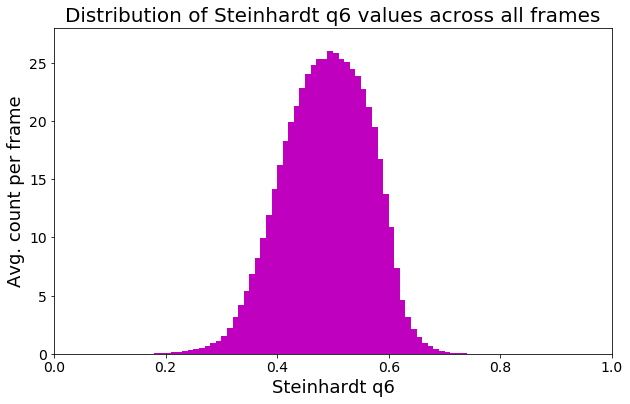

In [35]:
plt.figure(figsize=(10,6))
plt.hist(vals, bins=100, range=(0,1), color='m')
plt.xlim(0, 1)
plt.ylim(0, len(df)*28)
plt.yticks(range(0, len(df)*30, len(df)*5), labels=range(0, 30, 5))
plt.tick_params(labelsize=14)
plt.xlabel("Steinhardt q6", fontsize=18)
plt.ylabel("Avg. count per frame", fontsize=18)
plt.title("Distribution of Steinhardt q6 values across all frames", fontsize=20)
plt.show()

The second graph shows the average q6 value over time. This is calculated using `pandas.DataFrame.mean()`.

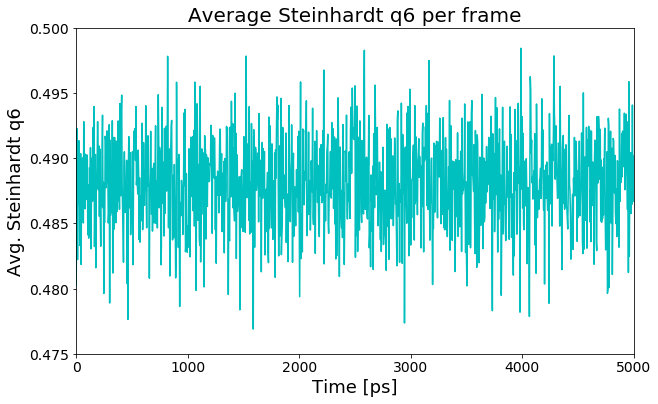

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(0, 4*len(df), 4), np.array(df.mean(axis=1)), color="c")
plt.xlim(0, 4*len(df))
plt.ylim(0.475, 0.5)
plt.tick_params(labelsize=14)
plt.xlabel("Time [ps]", fontsize=18)
plt.ylabel("Avg. Steinhardt q6", fontsize=18)
plt.title("Average Steinhardt q6 per frame", fontsize=20)
plt.show()